In [128]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [129]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [130]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [131]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [132]:
# Declare a Base using `automap_base()`
Base = automap_base()

In [133]:
# reflect an existing database into a new model
Base.prepare(engine, reflect=True)

# reflect the tables


In [134]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [135]:
# Save references to each table
measurement = Base.classes.measurement



In [136]:

station =  Base.classes.station


In [137]:
# Create our session (link) from Python to the DB
session = Session(engine)



# Exploratory Precipitation Analysis

In [138]:
# Display the row's columns and data in dictionary format -measurement (I added this from an in class activity)

first_row = session.query(measurement).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x2a22dde49b0>,
 'id': 1,
 'prcp': 0.08,
 'station': 'USC00519397',
 'tobs': 65.0,
 'date': '2010-01-01'}

In [142]:
engine.execute('SELECT * FROM measurement LIMIT 5').fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0)]

In [140]:
# Oldest/earliest Date in data set (I added this from class activity to know more about data)
session.query(measurement.date).order_by(measurement.date).first()

('2010-01-01')

In [143]:
# Find the most recent date in the data set.

session.query(measurement.date).order_by(measurement.date.desc()).first()

('2017-08-23')

In [74]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 


In [144]:
#recent date varible for forumlas - .date was from web allowed variable to not be a tuple/list
recent_date = session.query(measurement.date).order_by(measurement.date.desc()).first().date
recent_date

'2017-08-23'

In [145]:
# Calculate the date one year from the last date in data set.
last_twelve_months = dt.datetime.strptime(recent_date, '%Y-%m-%d') - dt.timedelta(days=365)
last_twelve_months

datetime.datetime(2016, 8, 23, 0, 0)

In [146]:
# Perform a query to retrieve the data and precipitation scores
precip_data =session.query(measurement.date, func.avg(measurement.prcp)).\
    filter(measurement.date >= last_twelve_months).\
    group_by(measurement.date).all()
precip_data

[('2016-08-24', 1.5549999999999997),
 ('2016-08-25', 0.07714285714285715),
 ('2016-08-26', 0.016666666666666666),
 ('2016-08-27', 0.06399999999999999),
 ('2016-08-28', 0.5166666666666666),
 ('2016-08-29', 0.24333333333333332),
 ('2016-08-30', 0.011666666666666667),
 ('2016-08-31', 0.6359999999999999),
 ('2016-09-01', 0.006),
 ('2016-09-02', 0.05),
 ('2016-09-03', 0.254),
 ('2016-09-04', 0.276),
 ('2016-09-05', 0.08499999999999999),
 ('2016-09-06', 0.246),
 ('2016-09-07', 0.3333333333333333),
 ('2016-09-08', 0.07666666666666667),
 ('2016-09-09', 0.17833333333333332),
 ('2016-09-10', 0.27999999999999997),
 ('2016-09-11', 0.25),
 ('2016-09-12', 0.308),
 ('2016-09-13', 0.45166666666666666),
 ('2016-09-14', 2.3800000000000003),
 ('2016-09-15', 0.8266666666666667),
 ('2016-09-16', 0.11714285714285715),
 ('2016-09-17', 0.13599999999999998),
 ('2016-09-18', 0.10600000000000001),
 ('2016-09-19', 0.064),
 ('2016-09-20', 0.14714285714285716),
 ('2016-09-21', 0.19499999999999998),
 ('2016-09-22', 

In [147]:
# Save the query results as a Pandas DataFrame and set the index to the date column
Precip_df = pd.DataFrame(precip_data, columns=['date', 'Daily Av. Precipitation'])
Precip_df.set_index('date', inplace=True)
Precip_df

,Daily Av. Precipitation
date,
2016-08-24,1.555000
2016-08-25,0.077143
2016-08-26,0.016667
2016-08-27,0.064000
2016-08-28,0.516667
...,...
2017-08-19,0.030000
2017-08-20,0.005000
2017-08-21,0.193333


In [148]:
# Sort the dataframe by date
Precip_df.sort_values('date', ascending = True)
Precip_df

,Daily Av. Precipitation
date,
2016-08-24,1.555000
2016-08-25,0.077143
2016-08-26,0.016667
2016-08-27,0.064000
2016-08-28,0.516667
...,...
2017-08-19,0.030000
2017-08-20,0.005000
2017-08-21,0.193333


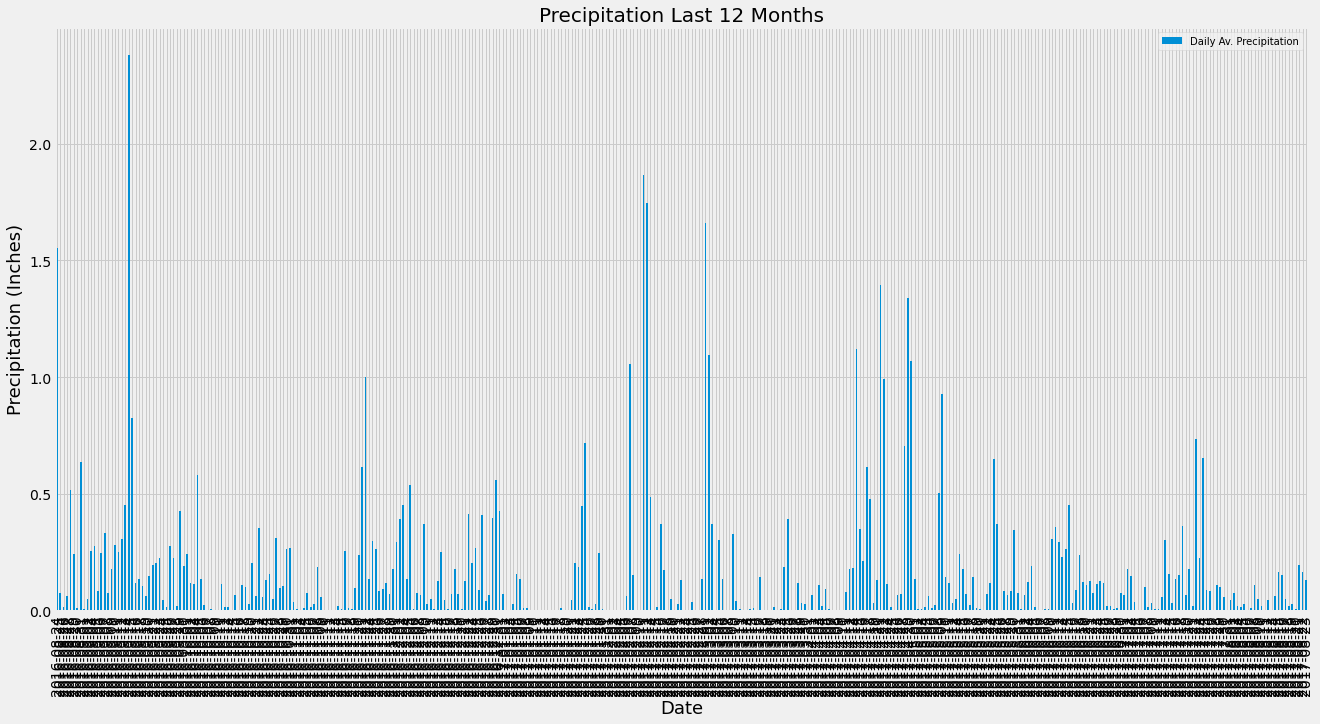

In [123]:
# Use Pandas Plotting with Matplotlib to plot the data


Precip_df.plot.bar(figsize=(20,10))
#plt.tight_layout()
plt.legend(fontsize="10")
plt.title("Precipitation Last 12 Months", size=20)
plt.ylabel("Precipitation (Inches)", size=18)
plt.xlabel("Date", size=18)
plt.show()

In [152]:
#wanted to try to get the average monthly precip and then plot since 365 days on a plot is too busy - will attempt later

# monthly_av = Precip_df.groupby('date').agg(np.mean)[['Daily Av. Precipitation']]
# monthly_av

# monthly_av = Precip_df.groupby(Precip_df['date'].dt.strftime('%B'))['Daily Av. Precipitation'].np.mean().sort_values()
# monthly_av

In [125]:
# Use Pandas to calcualte the summary statistics for the precipitation data
Precip_df.describe()

,Daily Av. Precipitation
count,365.000000
mean,0.169987
std,0.295722
min,0.000000
25%,0.008571
50%,0.070000
75%,0.191667
max,2.380000


In [153]:
# Exploratory Station Analysis

engine.execute('SELECT * FROM station LIMIT 5').fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0)]

In [61]:
# Display the row's columns and data in dictionary format - station
first_row = session.query(station).first()
first_row.__dict__


{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x2a22d28c240>,
 'id': 1,
 'elevation': 3.0,
 'latitude': 21.2716,
 'station': 'USC00519397',
 'longitude': -157.8168,
 'name': 'WAIKIKI 717.2, HI US'}

In [126]:
# Design a query to calculate the total number stations in the dataset
number_stations = session.query(station).count()
number_stations

9

In [ ]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.


In [ ]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.


In [ ]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close session

In [127]:
# Close Session
session.close()